# Sorting Algorithms Project, Compuational Thinking Module (5 Credits)

## Eimear Butler, April 2019

--------

This jupyter notebook is connected to the following repository: https://github.com/eimearbutler7/Computational-Thinking-Project-2019

The primary document is this Jupyter Notebook.

To run this document you must have installed software to run python code (https://www.python.org/), for example the Anaconda package (https://www.anaconda.com/).

By running each cell in succession, it will generate a dataframe of randomly generated numbers that are somewhat reflective of real life real estate sales data.

All references and sources used to support the code creation are documented within the ipynb file. No other datasets are required.

All supplimentary documentation is also stored in the repository.

--------

For this project, I will write a Python application which will be used to benchmark five different sorting algorithms. 

The following 5 algorithms will be discussed:

1. A simple comparison-based sort: Insertion Sort
2. A simple comparison-based sort: Selection Sort
3. A simple comparison-based sort: Bubble Sort
4. A non-comparison sort: Bucket Sort
5. An efficient comparison-based sort:  Merge Sort



## The structure (and scoring) for this report will be as follows: 

**Introduction (10 marks)**

- **Insertion Sort**
- **Selection Sort**
- **Bubble Sort**
- **Bucket Sort**
- **Merge Sort**

    Each of the 5 sections are marked as follows: 
    - Python Application (3 marks) 
    - Sorting Algorithms (5 marks)
    - Implementation & Benchmarking (2 marks)
    
    

**Conclusion**

NOTE: the results obtained during development are included in the last section for reference. It is acknowledged new results will be obtained each time this notebook will run. It should also be noted that this notebook will take some time to run fully as Selection Sort and Bubble Sort take some procesing time to complete. 


------------------------------------

# Introduction



### What is a sorting algorithm? 
Sorting algorithms are, as they sound, processes to analyse lists and sort them into a pre-defined order.


### When are they used? 
Sorting algorithms are used throughout computer science. From answering relatively simple questions like the min/max/mean of a data set to determining layers of graphics in computer games. 


### What are useful characteristics to describe sorting algorithms? 
**Comparison-based sort:** an algorithm that relies on comparing elements within the data set and deciding a number of times which element is the larger and move that element to one end of the list. 


**In place sorting:** is defined as: oes not need an extra space and produces an output in the same memory that contains the data by transforming the input ‘in-place’. However, a small constant extra space used for variables is allowed. <br/> Source: https://www.geeksforgeeks.org/in-place-algorithm/


**Stable sorting:** A stable sort will output the same results every time. For example, where 2 elements have the same value, other factors will be consistently considered to produce the same results. 


**Worst-case time efficiency:** In order to understand how efficient the algorithm will be in terms of time efficiency, the algorithms are assessed to find out what order of magnitude grouping each fall into (AKA Big O Notation). Each group is determined on the reaction of the algorithm to increasing number of elements in the list. See also the first slide presented below.  


**MODULE NOTES** <br/>
Three of the most useful slides presented during the Computational Thinking module to date are reproduced below as a reference for this assignment. 

The first slides present the overview of the expected efficiency of algorithm: 

<img style="float: right;" src="https://github.com/eimearbutler7/Computational-Thinking-Project-2019/blob/master/SmartSelect_20190405-080945_Chrome.jpg?raw=true" width="500"/>


<img style="float: left;" src="https://github.com/eimearbutler7/Computational-Thinking-Project-2019/blob/master/graph.png?raw=true" width="500"/>

The next slide presents criteria that will suit eash sorting slgorithm to use them most effective: 

<img src="https://github.com/eimearbutler7/Computational-Thinking-Project-2019/blob/master/SmartSelect_20190404-075447_Chrome.jpg?raw=true" width="500"/>

---------------

## Preparation

In order to now be able to use ipython to analyse the sorting algorithms, a number of supporting modules to have the functionality needed to complete this task must be imported...

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import timeit
import time
from datetime import datetime
from datetime import timedelta

Eight different length arrays of random integers are also created to test each sorting algorithm below...

In [73]:
arr100 = np.random.randint(10000000, size=100) 
arr500 = np.random.randint(10000000, size=500)
arr1000 = np.random.randint(10000000, size=1000)
arr2500 = np.random.randint(10000000, size=2500)
arr5000 = np.random.randint(10000000, size=5000)
arr7500 = np.random.randint(10000000, size=7500)
arr10000 = np.random.randint(10000000, size=10000)
arr12500 = np.random.randint(10000000, size=12500)
#source: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html

--------------------

# 1) Insertion Sort: 

<img style="float: right;" src="https://upload.wikimedia.org/wikipedia/commons/4/42/Insertion_sort.gif" alt="insertion" width="200"/>

This sort takes each element, one by one and sorts it relative to all previously sorted data. By moving systematically through the data set, it eventually moves the elements into order. 

A visual demonstration of this is seen to the right. 


- Worst Time Complexity: O(n<sup>2</sup>)
- Average Time Complexity: O(n<sup>2</sup>)
- Complexity to code: relatively simple 
- Comparison sort?: Yes 
- In place? Yes
- Stable? Yes
- When to use: suitable for use with small data sets but loses speed and therefore effectiveness with larger data sets. 


<br/>

gif source: https://upload.wikimedia.org/wikipedia/commons/4/42/Insertion_sort.gif <br/>
Supplimentary information source: www.geeksforgeeks.org/insertion-sort/amp/

### A function that can do an Insertion Sort is below:

In [74]:
def insertionSort(arr):          #define a function called incertionSort which accepts an input called "arr"
    for i in range(1, len(arr)): # For each entry in the list....  
        key = arr[i] #create a variable called "key" which will be the data set at location "i"
                     #as per line 5, "i" will be each of the locations in the data set
        j = i-1      #j works to move the elements in the dataset that are greater than "i" one position infront of i
                     # i.e. recognose it is greater than "i"  
        while j >= 0 and key < arr[j] : #while loop determines if next number is bigger than the key and ensures that the sort terminates when the data set has been sorted
            arr[j + 1] = arr[j] #moving to 1 position above "j" each time moves to the next position within the array 
            j -= 1          # decreasing "j" by 1 each time   
        arr[j + 1] = key    #dataset location of j increasing by 1 moves key to next location in the list
        
    
#Source: https://www.geeksforgeeks.org/insertion-sort/

### Testing this out on a small dataset shows it indeed works

In [75]:
arr_ins = [12, 11, 13, 5, 6] 

insertionSort(arr_ins)
for i in range(len(arr_ins)): 
    print ("% d" % arr_ins[i])


 5
 6
 11
 12
 13


### TimeIt
It should be noted that I tried to run the time check using the timeit function which was interesting to see but this did not give me the flexibilty to test multiple dataset sizes in a controled way where I could display the results I needed. Example below. 

In [76]:
# this code will only be executed once 
mysetup = "from math import sqrt"
  
# this code will be measured 
mycode = '''def insertionSort(arr1):          
                for i in range(1, len(arr)): # For each entry in the list....  
                    key = arr[i] #create a variable called "key" which will be the data set at location "i"
                     #as per line 5, "i" will be each of the locations in the data set
                    j = i-1      #j works to move the elements in the dataset that are greater than "i" one position infront of i
                     # i.e. recognose it is greater than "i"  
                while j >= 0 and key < arr[j] : #while loop to ensure sort terminates when the data set has been sorted
                    arr[j + 1] = arr[j] #increasing "j" by 1 each time moves to the next position within the array 
                    j -= 1          # decreasing "j" by 1 again  
                    arr[j + 1] = key    #dataset location of j increasing by 1
            '''
 
#print(timeit.timeit(setup = mysetup, stmt = mycode, number = 10000))

insSort = np.average(timeit.repeat(setup = mysetup, stmt = mycode, repeat=10, number = 10000))
ins_avg = round(insSort*1000, 4)
print("Average run time for InsertionSort using timeit function, repeating the function 10 times, is", ins_avg, 'miliseconds')

# Source: https://www.geeksforgeeks.org/timeit-python-examples/   

Average run time for InsertionSort using timeit function, repeating the function 10 times, is 0.4672 miliseconds


### The time to run the code for each of the 8 different sized datasets is run here instead...

Note: according to ipython documentation, time.time returns "the time in seconds since the epoch as a floating point number."

Therefore, the result "x" below will be in seconds and we must multiply it by 1000 to then convert it into miliseconds as required by the assignment.

In [77]:
### Create funstion to calculate th eaverage length of time the coe takes to run over 10 cycles ###

def timer_test_ins(random_input): #create function with the random array as the input
    output = []               #create empty list which will have the result of each sysle appended into it
    for i in range(1, 11):    # instruct function to run 10 times
        random_input        #generates a new array of random numbers for each run  
        start = time.time() #time as the code processes this line
        insertionSort(random_input) #the sort code function (previously programmed in) is run and uses the random array as the input list to sort 
        end = time.time() #time as the code processes this line
        x = (end - start)*1000 #difference in time between start and end, multiplied by 1000 to convert seconds to miliseconds
        output.append(x) #the resulting time is added to the list 

    y = sum(output)/len(output) #find the average of all 10 runs and store it as y

    return y  #return y as the output from the function

#code written myself with some inspiration from the suggested code provided in the assignment paper

In [78]:
ins_1 = timer_test_ins(arr100) #now call the function for each of the array sizes
ins_2 = timer_test_ins(arr500)
ins_3 = timer_test_ins(arr1000)
ins_4 = timer_test_ins(arr2500)
ins_5 = timer_test_ins(arr5000)
ins_6 = timer_test_ins(arr7500)
ins_7 = timer_test_ins(arr10000)
ins_8 = timer_test_ins(arr12500)

In [79]:
ins_result = [round(ins_1, 4), round(ins_2, 4), round(ins_3, 4), round(ins_4, 4), round(ins_5, 4), round(ins_6, 4), round(ins_7, 4), round(ins_8, 4)] #create an array of the results
index =['arr100', 'arr500', 'arr1000', 'arr2500', 'arr5000', 'arr7500', 'arr10000', 'arr12000']#create an index group to identify which result was from which input
df = pd.DataFrame({'insertion_sort':ins_result, 'index':index}).set_index('index') #create dataframe to display the results
df  #show df

,insertion_sort
index,
arr100,0.0997
arr500,1.8948
arr1000,7.3803
arr2500,47.9720
arr5000,183.1115
arr7500,415.9951
arr10000,784.3004
arr12000,1150.1277


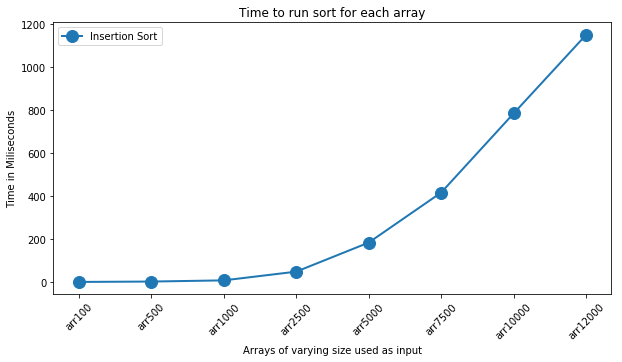

In [80]:
plt.figure(figsize=(10,5)) #plot results on a graph -  code written myself
plt.plot(index, ins_result, marker='o', linewidth=2, markersize=12, label='Insertion Sort')
plt.ylabel('Time in Miliseconds')
plt.xlabel('Arrays of varying size used as input')
plt.xticks(np.arange(0, 8, step=1), rotation=45)
plt.title('Time to run sort for each array')
plt.legend()
plt.show()

### Benchmarking

As seen in the graph, the time taken to implement the algorithm increases exponentially as the number of elements in the data set increases. This is as expected by the O(n<sup>2</sup>) average/worst complexity. It is realtively easy to code but in reality, will have limited use. 

______________________________

# 2) Selection Sort (Simple and efficient on small data): 

<img style="float: right;" src="https://upload.wikimedia.org/wikipedia/commons/9/94/Selection-Sort-Animation.gif" alt="insertion" width="75"/>

This sort runs through either the full set of data (first run) or a subset of the data that has not been assigned a final location yet (all other remaining runs) each time to see which of the elements meets the criteria for the next position (lowest or highest depending on the requirements of the algorithm). Once it establishes the element that best fits, it allocates the element into that position and then moves onto the next run to find the next element that will best fit the next position. This again requires the algorith to look at all remaining elements.that do not yet have a location. 


A visual demonstration of this is seen on the right. 

- Worst Time Complexity: O(n<sup>2</sup>)
- Average Time Complexity: O(n<sup>2</sup>)
- Complexity to code: relatively simple 
- Comparison sort? Yes 
- In place? Yes
- Stable: Yes
- When to use: predictable number of swaps and therefore useful when memory write is a concern however, not suitable for large data sets and generally Less effective than insertion sort


<br/>

gif source: https://upload.wikimedia.org/wikipedia/commons/9/94/Selection-Sort-Animation.gif <br/>
Supplimentary information source: www.geeksforgeeks.org/selection-sort/amp/


### A function that can perform a Selection Sort is below:

In [81]:
def selectionSort(alist):
    for fillslot in range(len(alist)-1,0,-1):    
        positionOfMax=0
        for location in range(1,fillslot+1):     #moving through the array...
            if alist[location]>alist[positionOfMax]: #search for the smallest number in the unsorted array
                positionOfMax = location            

        temp = alist[fillslot]                 #move the smaller element into the first unsorted location
        alist[fillslot] = alist[positionOfMax]  
        alist[positionOfMax] = temp

### Testing this out on a small dataset shows it indeed works

In [82]:
alist = [54,26,93,17,77,31,44,55,20]
selectionSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


### The time to run the code for each of the 8 different sized datasets is

In [83]:
### Create funstion to calculate th eaverage length of time the coe takes to run over 10 cycles ###

def timer_test_sel(random_input): #create function with the random array as the input
    output = []               #create empty list which will have the result of each sysle appended into it
    for i in range(1, 11):    # instruct function to run 10 times
        random_input        #generates a new array of random numbers for each run  
        start = time.time() #time as the code processes this line
        selectionSort(random_input) #the sort code function (previously programmed in) is run and uses the random array as the input list to sort 
        end = time.time() #time as the code processes this line
        x = (end - start)*1000 #difference in time between start and end, multiplied by 1000 to convert seconds to miliseconds
        output.append(x) #the resulting time is added to the list 

    y = sum(output)/len(output) #find the average of all 10 runs and store it as ins_y

    return y  #return ins_y as the output from the function

#code written myself with some inspiration from the suggested code provided in the assignment paper

In [84]:
sel_1 = timer_test_sel(arr100) #now call the function for each of the array sizes
sel_2 = timer_test_sel(arr500)
sel_3 = timer_test_sel(arr1000)
sel_4 = timer_test_sel(arr2500)
sel_5 = timer_test_sel(arr5000)
sel_6 = timer_test_sel(arr7500)
sel_7 = timer_test_sel(arr10000)
sel_8 = timer_test_sel(arr12500)

In [85]:
sel_result = [round(sel_1, 4), round(sel_2, 4), round(sel_3, 4), round(sel_4, 4), round(sel_5, 4), round(sel_6, 4), round(sel_7, 4), round(sel_8, 4)] #create an array of the results
df = pd.DataFrame({'selection_sort':sel_result, 'index':index}).set_index('index') #create dataframe to display the results
df  #show df

,selection_sort
index,
arr100,0.8975
arr500,20.6480
arr1000,77.0958
arr2500,525.4917
arr5000,2190.6478
arr7500,4970.4258
arr10000,8608.6502
arr12000,13448.9906


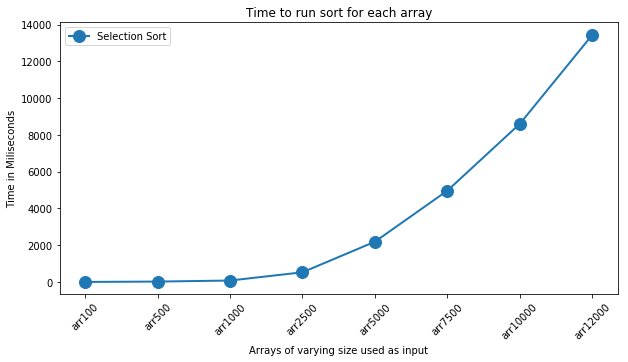

In [86]:
plt.figure(figsize=(10,5))  #plot results on a graph -  code written myself
plt.plot(index, sel_result, marker='o', linewidth=2, markersize=12, label='Selection Sort')
plt.ylabel('Time in Miliseconds')
plt.xlabel('Arrays of varying size used as input')
plt.xticks(np.arange(0, 8, step=1), rotation=45)
plt.title('Time to run sort for each array')
plt.legend()
plt.show()

### Benchmarking

Again seen in the graph, the time taken to implement the algorithm increases exponentially as the number of elements in the data set increases. This is as expected by the O(n<sup>2</sup>) complexity. Once more, it is realtively easy to code but in reality, will have limited use. 


It should be noted that the scale of time for this curve is much higher than the Insertion Sort and Insertion sort will be much faster overall. This will be more obvious when all curves are combined later in the notebook. 

___________________________________________

# 3) Bubble Sort (Simple and somewhat efficient on small data sets): 


<img style="float: right;" src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Bubble-sort-example-300px.gif" alt="insertion" width="300"/>


This sort cycles through either the full set of data (first run) or a subset of the data that has not been assigned a final location yet (all other remaining runs) each time to see which of the elements meets the criteria for the next position (lowest or highest depending on the requirements of the algorithm). The algorithm compares the first and second elements and decides which order they should be. It then compares the second and third, third and fourth and so on until it has moved through the while list. 

Once it establishes the bigger elements will therefore migrate, or bubble, towards the end and the smaller to the start with each cycle. 


A visual demonstration of this is seen on the right. 

- Worst Time Complexity: O(n<sup>2</sup>)
- Average Time Complexity: O(n<sup>2</sup>)
- Complexity to code: considered one of the *most* simple 
- Comparison sort? Yes 
- In place? Yes
- Stable: Yes
- When to use: It should b enoted that often it is less efficient than other similar algorithms like Insertion and Selection sorts. Only used for smaller data sets and for demonstrations/training due to its simplicity. Not suitable for large data sets.

<br/>

gif source: https://upload.wikimedia.org/wikipedia/commons/c/c8/Bubble-sort-example-300px.gif <br/>
Supplimentary information source: www.geeksforgeeks.org/bubble-sort/amp/

### A function that can perform a Bubble Sort is below:

In [87]:
def bubbleSort(alist):
    for passnum in range(len(alist)-1,0,-1):
        for i in range(passnum):
            if alist[i]>alist[i+1]:
                temp = alist[i]
                alist[i] = alist[i+1]
                alist[i+1] = temp
                
#source: http://interactivepython.org/runestone/static/pythonds/SortSearch/TheBubbleSort.html

### Testing this out on a small dataset shows it indeed works

In [88]:
alist = [54,26,93,17,77,31,44,55,20]
bubbleSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


### The time to run the code for each of the 8 different sized datasets is

In [89]:
def timer_test_bub(random_input): #create function with the random array as the input
    output = []               #create empty list which will have the result of each sysle appended into it
    for i in range(1, 11):    # instruct function to run 10 times
        random_input        #generates a new array of random numbers for each run  
        start = time.time() #time as the code processes this line
        bubbleSort(random_input) #the sort code function (previously programmed in) is run and uses the random array as the input list to sort 
        end = time.time() #time as the code processes this line
        x = (end - start)*1000 #difference in time between start and end, multiplied by 1000 to convert seconds to miliseconds
        output.append(x) #the resulting time is added to the list 

    y = sum(output)/len(output) #find the average of all 10 runs and store it as y

    return y  #return y as the output from the function

#code written myself with some inspiration from the suggested code provided in the assignment paper

In [90]:
bub_1 = timer_test_bub(arr100) #now call the function for each of the array sizes
bub_2 = timer_test_bub(arr500)
bub_3 = timer_test_bub(arr1000)
bub_4 = timer_test_bub(arr2500)
bub_5 = timer_test_bub(arr5000)
bub_6 = timer_test_bub(arr7500)
bub_7 = timer_test_bub(arr10000)
bub_8 = timer_test_bub(arr12500)

In [91]:
bub_result = [round(bub_1, 4), round(bub_2, 4), round(bub_3, 4), round(bub_4, 4), round(bub_5, 4), round(bub_6, 4), round(bub_7, 4), round(bub_8, 4)] #create an array of the results
df = pd.DataFrame({'bubble_sort':bub_result, 'index':index}).set_index('index') #create dataframe to display the results
df  #show df

,bubble_sort
index,
arr100,1.0010
arr500,25.5286
arr1000,96.0453
arr2500,606.4960
arr5000,2422.1737
arr7500,5520.3631
arr10000,9613.4986
arr12000,14815.1280


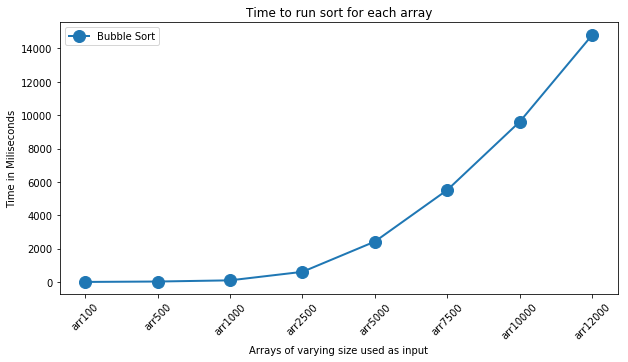

In [92]:
plt.figure(figsize=(10,5)) #plot results on a graph -  code written myself
plt.plot(index, bub_result, marker='o', linewidth=2, markersize=12, label='Bubble Sort')
plt.ylabel('Time in Miliseconds')
plt.xlabel('Arrays of varying size used as input')
plt.xticks(np.arange(0, 8, step=1), rotation=45)
plt.title('Time to run sort for each array')
plt.legend()
plt.show()

### Benchmarking

Again seen in the graph, the time taken to implement the algorithm increases exponentially as the number of elements in the data set increases. This is as expected by the O(n<sup>2</sup>) average/worst complexity. Once more, it is realtively easy to code but in reality, will have limited use. 

Note: the scale of time for this graph is comparable to Selection Sort and although both are O(n<sup>2</sup>), Insertion sort is demonstrating much faster sorts on these data sets. 

__________________________________

<img style="float: right;" src="https://image.freepik.com/free-vector/suit-deck-cards-round-buttons_47243-632.jpg" alt="insertion" width="300"/>

# 4) Bucket Sort (Simple and efficient on small data): 

This sort first aims to split the bigger more complex list into smaller groups, called buckets, <br/>before using a simple search to then sort out each bucket. 

An example of this is seen when sorting out a deck of playing cards. The person sorting may group based on suit <br/>creating 4 x 13 managable sets to work with to order the cards from Ace to King. 

- Worst Time Complexity: O(n<sup>2</sup>)
- Average case O(n+1)
- Complexity to code: more complex
- Comparison sort? No, a distribution sort when initially sorting into buckets but can incorporate comparison sort when sorting the managable size groups
- In place? No
- Stable: Yes
- When to use: Bucket sort is mainly useful for specific cases where the dataset is uniformly distributed over a range so that effective buckets can be created to divide up the list.

<br/>

gif source: https://image.freepik.com/free-vector/suit-deck-cards-round-buttons_47243-632.jpg <br/>
Supplimentary information source: www.geeksforgeeks.org/bucket-sort/amp/ & https://en.m.wikipedia.org/wiki/Bucket_sort

### A function that can perform a Bucket Sort is below:

In [93]:
import math

def bucketSort(array, bucketSize=100):
    if len(array) == 0:
        return array

  # Determine minimum and maximum values
    minValue = array[0]
    maxValue = array[0]
    for i in range(1, len(array)):
        if array[i] < minValue:
            minValue = array[i]
        elif array[i] > maxValue:
            maxValue = array[i]

  # Initialize buckets
    bucketCount = math.floor((maxValue - minValue) / bucketSize) + 1
    buckets = []
    for i in range(0, bucketCount):
        buckets.append([])

  # Distribute input array values into buckets
    for i in range(0, len(array)):
        buckets[math.floor((array[i] - minValue) / bucketSize)].append(array[i])

  # Sort buckets and place back into input array
    array = []
    for i in range(0, len(buckets)):
        insertionSort(buckets[i])
        for j in range(0, len(buckets[i])):
            array.append(buckets[i][j])

    return array

#Source: https://www.growingwiththeweb.com/2015/06/bucket-sort.html

### Testing this out on a small dataset shows it indeed works

In [94]:
bucketSort(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]

### The time to run the code for each of the 8 different sized datasets is

In [95]:
def timer_test_buc(random_input): #create function with the random array as the input
    output = []               #create empty list which will have the result of each sysle appended into it
    for i in range(1, 11):    # instruct function to run 10 times
        random_input        #generates a new array of random numbers for each run  
        start = time.time() #time as the code processes this line
        bucketSort(random_input) #the sort code function (previously programmed in) is run and uses the random array as the input list to sort 
        end = time.time() #time as the code processes this line
        x = (end - start)*1000 #difference in time between start and end, multiplied by 1000 to convert seconds to miliseconds
        output.append(x) #the resulting time is added to the list 

    y = sum(output)/len(output) #find the average of all 10 runs and store it as ins_y

    return y  #return ins_y as the output from the function

#code written myself with some inspiration from the suggested code provided in the assignment paper

In [96]:
buc_1 = timer_test_buc(arr100) #now call the function for each of the array sizes
buc_2 = timer_test_buc(arr500)
buc_3 = timer_test_buc(arr1000)
buc_4 = timer_test_buc(arr2500)
buc_5 = timer_test_buc(arr5000)
buc_6 = timer_test_buc(arr7500)
buc_7 = timer_test_buc(arr10000)
buc_8 = timer_test_buc(arr12500)

In [97]:
buc_result = [round(buc_1, 4), round(buc_2, 4), round(buc_3, 4), round(buc_4, 4), round(buc_5, 4), round(buc_6, 4), round(buc_7, 4), round(buc_8, 4)] #create an array of the results
df = pd.DataFrame({'bucket_sort':buc_result, 'index':index}).set_index('index') #create dataframe to display the results
df  #show df

,bucket_sort
index,
arr100,89.1959
arr500,89.1623
arr1000,90.7621
arr2500,89.8568
arr5000,96.3470
arr7500,98.6336
arr10000,100.1333
arr12000,102.2276


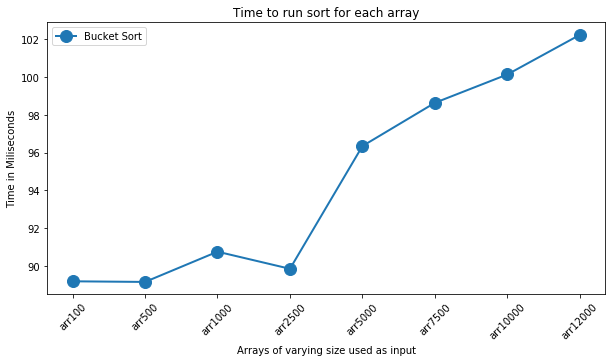

In [98]:
plt.figure(figsize=(10,5)) #plot results on a graph -  code written myself
plt.plot(index, buc_result, marker='o', linewidth=2, markersize=12, label='Bucket Sort')
plt.ylabel('Time in Miliseconds')
plt.xlabel('Arrays of varying size used as input')
plt.xticks(np.arange(0, 8, step=1), rotation=45)
plt.title('Time to run sort for each array')
plt.legend()
plt.show()

### Benchmarking

As seen in the graph, the time taken to implement the algorithm can vary significantly resulting in quite unpredictable results. As per the information known about the algorithm, it could be assumed that this is due to some random data sets being more evenly distributed than others. 


In terms of scale, this algorithm is still completing the task relatively quickly compared to Selection and Bubble sort. So although in the same order of magnitude, will be much more efficient. The results I have seen indicate that this algorithm is performing much more efficienlty than the worst case O(n<sup>2</sup>) and closer to average case (n+1). 

-----------------------------

# 5) Merge Sort (Simple and somewhat efficient on small data sets): 


<img style="float: right;" src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Merge-sort-example-300px.gif" alt="insertion" width="300"/>


This sort splits the data down by halving each list until it breaks them into lists of 1 element and then compares those elements to build the final sorted list up again. It is a Divide and Conquer algorithm.


A visual demonstration of this is seen on the right. 


- Worst Time Complexity: O(*n* log n)
- Average Time Complexity: O(*n* log n)
- Complexity to code: more complex
- Comparison sort? Yes
- In place? No
- Stable: Yes
- When to use: Where stable, reliable sorting is required rather than absolute speed. 

<br/>

gif source: https://upload.wikimedia.org/wikipedia/commons/c/cc/Merge-sort-example-300px.gif <br/>
Supplimentary information source: www.geeksforgeeks.org/merge-sort/amp/ & https://en.m.wikipedia.org/wiki/merge_sort

### A function to perform a Merge Sort is below:

In [99]:
def mergeSort(alist):
#    print("Splitting ",alist)
    if len(alist)>1:                      #when there is more than 2 elements in a list...
        mid = len(alist)//2               #split the list in 2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)    #continue to split both halves until the lists are down to 1 element
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf): #bring the elements back together comparing their values to get them in the right order 
            if lefthalf[i] < righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1
#    print("Merging ",alist)
    return alist
#Source: https://interactivepython.org/runestone/static/pythonds/SortSearch/TheMergeSort.html?highlight=merge%20sort

### Testing this out on a small dataset shows it indeed works

In [100]:
alist = [54,26,93,17,77,31,44,55,20]
mergeSort(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]

### The time to run the code for each of the 8 different sized datasets is

In [101]:
def timer_test_mer(random_input): #create function with the random array as the input
    output = []               #create empty list which will have the result of each sysle appended into it
    for i in range(1, 11):    # instruct function to run 10 times
        random_input        #generates a new array of random numbers for each run  
        start = time.time() #time as the code processes this line
        mergeSort(random_input) #the sort code function (previously programmed in) is run and uses the random array as the input list to sort 
        end = time.time() #time as the code processes this line
        x = (end - start)*1000 #difference in time between start and end, multiplied by 1000 to convert seconds to miliseconds
        output.append(x) #the resulting time is added to the list 

    y = sum(output)/len(output) #find the average of all 10 runs and store it as ins_y

    return y  #return y as the output from the function

#code written myself with some inspiration from the suggested code provided in the assignment paper

In [102]:
mer_1 = timer_test_mer(arr100) #now call the function for each of the array sizes
mer_2 = timer_test_mer(arr500)
mer_3 = timer_test_mer(arr1000)
mer_4 = timer_test_mer(arr2500)
mer_5 = timer_test_mer(arr5000)
mer_6 = timer_test_mer(arr7500)
mer_7 = timer_test_mer(arr10000)
mer_8 = timer_test_mer(arr12500)

In [103]:
mer_result = [round(mer_1, 4), round(mer_2, 4), round(mer_3, 4), round(mer_4, 4), round(mer_5, 4), round(mer_6, 4), round(mer_7, 4), round(mer_8, 4)] #create an array of the results
df = pd.DataFrame({'merge_sort':mer_result, 'index':index}).set_index('index') #create dataframe to display the results
df  #show df

,merge_sort
index,
arr100,0.3990
arr500,2.5929
arr1000,5.3856
arr2500,16.7554
arr5000,35.6052
arr7500,55.8512
arr10000,61.3405
arr12000,77.7925


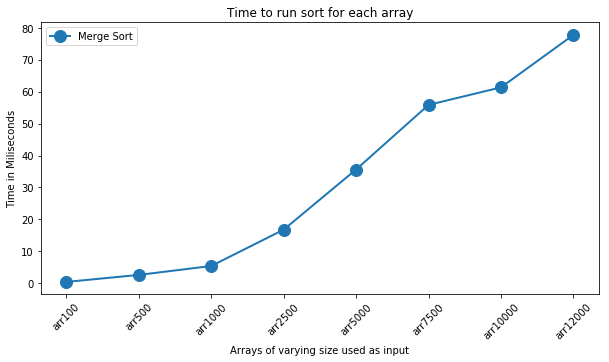

In [104]:
plt.figure(figsize=(10,5)) #plot results on a graph -  code written myself
plt.plot(index, mer_result, marker='o', linewidth=2, markersize=12, label='Merge Sort')
plt.ylabel('Time in Miliseconds')
plt.xlabel('Arrays of varying size used as input')
plt.xticks(np.arange(0, 8, step=1), rotation=45)
plt.title('Time to run sort for each array')
plt.legend()
plt.show()

### Benchmarking

As seen in the graph, the time taken to implement the algorithm does not increase as quickly as the exponential examples seen previously.  


In terms of scale, this algorithm is completing the task much quicker compared to Selection/Bubble sort and even faster than Insertion sort and Bucket sort. So in this case, the change in order of magnitude to O(n log n) can be seen.

---------------------------------------------------------

# Summarised Results

The table below shows the average time from 10 applications of each sorting algorithm on varying array sizes.

In [105]:
df = pd.DataFrame({'insertion_sort':ins_result, 'selection_sort':sel_result, 'bubble_sort':bub_result, 'bucket_sort':buc_result, 'merge_sort':mer_result, 'index':index}).set_index('index') #create dataframe to display the results
df  #show df

,insertion_sort,selection_sort,bubble_sort,bucket_sort,merge_sort
index,,,,,
arr100,0.0997,0.8975,1.0010,89.1959,0.3990
arr500,1.8948,20.6480,25.5286,89.1623,2.5929
arr1000,7.3803,77.0958,96.0453,90.7621,5.3856
arr2500,47.9720,525.4917,606.4960,89.8568,16.7554
arr5000,183.1115,2190.6478,2422.1737,96.3470,35.6052
arr7500,415.9951,4970.4258,5520.3631,98.6336,55.8512
arr10000,784.3004,8608.6502,9613.4986,100.1333,61.3405
arr12000,1150.1277,13448.9906,14815.1280,102.2276,77.7925


As discussed for each analysis of individual algorithms, the results have been in line with the theory presented in advance.  

### The plot below then shows the data points visually.

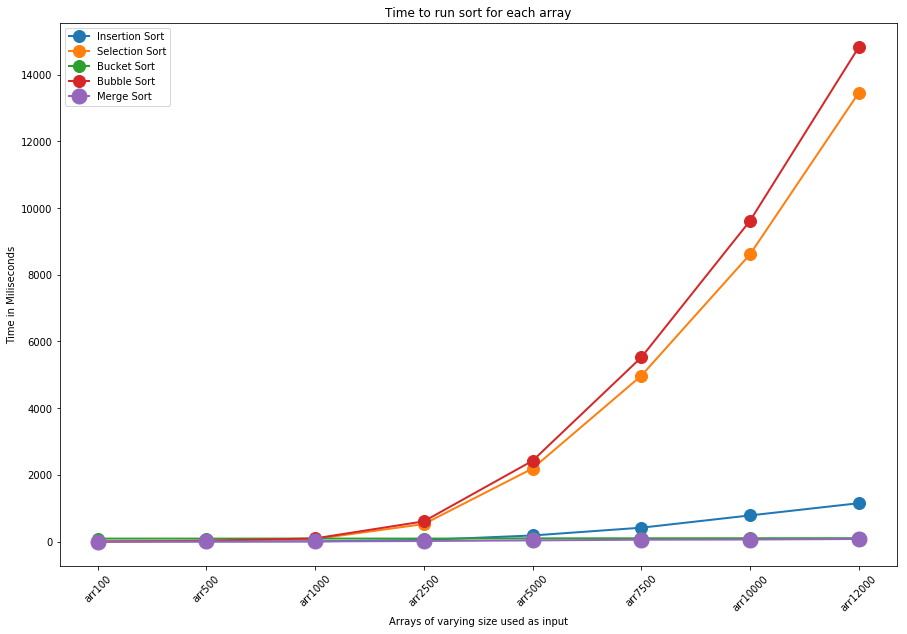

In [106]:
plt.figure(figsize=(15,10)) #plot results on a graph -  code written myself
plt.plot(index, ins_result, marker='o', linewidth=2, markersize=12, label='Insertion Sort')
plt.plot(index, sel_result, marker='o', linewidth=2, markersize=12, label='Selection Sort')
plt.plot(index, buc_result, marker='o', linewidth=2, markersize=12, label='Bucket Sort')
plt.plot(index, bub_result, marker='o', linewidth=2, markersize=12, label='Bubble Sort')
plt.plot(index, mer_result, marker='o', linewidth=2, markersize=15, label='Merge Sort')
plt.ylabel('Time in Miliseconds')
plt.xlabel('Arrays of varying size used as input')
plt.xticks(np.arange(0, 8, step=1), rotation=45)
plt.title('Time to run sort for each array')
plt.legend()
plt.show()

# Conclusion

Bucket Sort and Merge Sort have resulted in the quickest algorithms. Insertion Sort has also shown itself to be the quickest of the remaining three. Selection Sort and Bubble Sort really showed their inefficiency when dealing with moderate size data sets. From experience, I know that ipython is using much faster algorithms even than all the examples here when analysing data. I have been developing analysis tools for 15,000 rows of .csv output relating to product complaints in order to assess our products performance. Jupyter Notebooks handle theis metadata much more effecicienty datasets that are even a little bigger.

# Reference data produced when writing the report

<img style="float: centre;" src="https://github.com/eimearbutler7/Computational-Thinking-Project-2019/blob/master/Insertion%20Results.png?raw=true" alt="insertion" width="1000"/>

<img style="float: centre;" src="https://github.com/eimearbutler7/Computational-Thinking-Project-2019/blob/master/selection%20results.png?raw=true" alt="insertion" width="1000"/>

<img style="float: centre;" src="https://github.com/eimearbutler7/Computational-Thinking-Project-2019/blob/master/Bubble%20result.png?raw=true" alt="insertion" width="1000"/>

<img style="float: centre;" src="https://github.com/eimearbutler7/Computational-Thinking-Project-2019/blob/master/Bucket%20results.png?raw=true" alt="insertion" width="1000"/>

<img style="float: centre;" src="https://github.com/eimearbutler7/Computational-Thinking-Project-2019/blob/master/Merge%20Result.png?raw=true" alt="insertion" width="1000"/>

<img style="float: centre;" src="https://github.com/eimearbutler7/Computational-Thinking-Project-2019/blob/master/Table.png?raw=true" alt="insertion" width="1000"/>

# END